In [1]:
N = 100000
BINS = 300

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Exercise 1
Sample from truncated notmal `[-0.8, 0.8]`

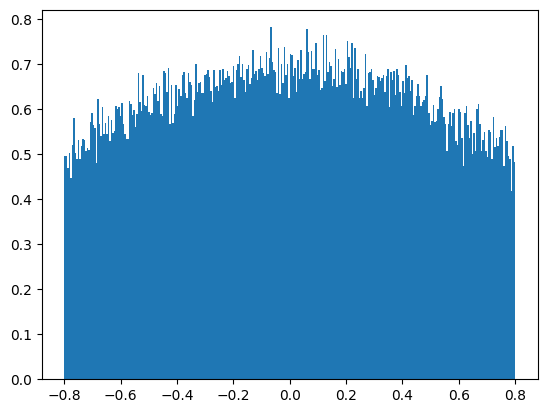

In [4]:
# We just reject the samples out of bounds
def truncated_gaussian(a, b, N, mean=0, std=1):
    trun = []
    while len(trun) < N:
        x = np.random.normal(mean, std)
        if a < x < b:
            trun.append(x)
    return np.array(trun)

a1 = -0.8
b1 = 0.8
trun = truncated_gaussian(a1, b1, N)

plt.hist(trun, bins=BINS, density=True);

### Exercise 2
Simulate data from a non-linear model

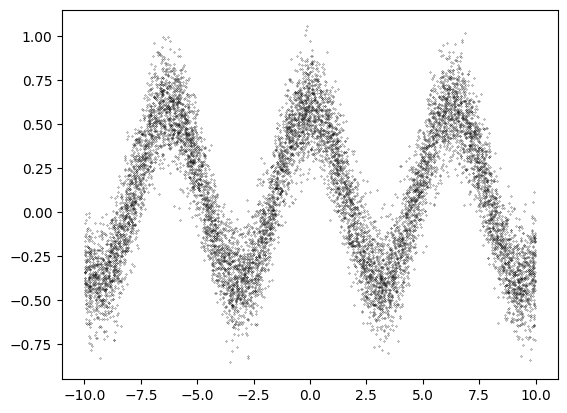

In [5]:
import numpy as np
import matplotlib .pyplot as plt

n = 10000

x = np.random.uniform(-10 , 10 , n)

a = 0.5
b = 0.1
sigma_0 = 0.15 # this is the standard deviation , not the variance!

y = a * np.cos(x) + b + sigma_0 * np.random.normal(0, 1, n)

plt.scatter(x, y, color='k', alpha=1, s=0.05)
plt.show ()


### Exercise 3
Use Box-Muller transform to sample from Gaussians

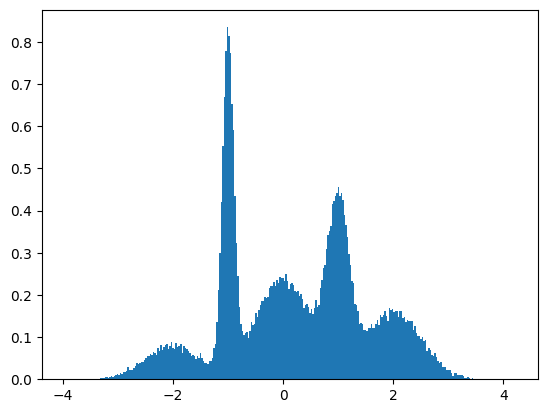

In [16]:
def box_muller(n, mean=0, std=1):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    z1 = r * np.cos(theta)
    return z1 * std + mean

# Weighted sum of gaussians
weights = [0.1, 0.2, 0.3, 0.2, 0.2]
means = [-2, -1, 0, 1, 2]
stds = [0.5, 0.1, 0.5, 0.2, 0.5]

# Generate the weighted mixture of Gaussians
weighted_gaussians = np.zeros(N)

# Choose a Gaussian based on the given weights for each sample
chosen_gaussians = np.random.choice(len(weights), size=N, p=weights)

for i, (m, s) in enumerate(zip(means, stds)):
    # Mask for samples chosen for this Gaussian
    mask = chosen_gaussians == i
    n_samples = np.sum(mask)
    weighted_gaussians[mask] = box_muller(n_samples, m, s)
plt.hist(weighted_gaussians, bins=BINS, density=True);


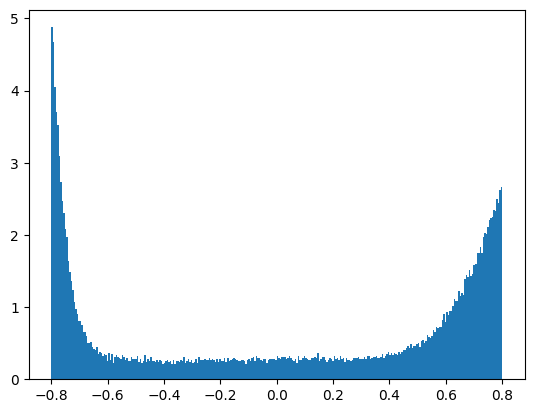

In [18]:
# Truncated box-muller gaussian
def truncated_box_muller(a, b, N, mean=0, std=1):
    trun = []
    batch = N // 5
    while len(trun) < N:
        x = box_muller(batch, mean, std)
        trun.extend(x[(a < x) & (x < b)])
    return np.array(trun[:N])

# Generate the weighted mixture of truncated Gaussians
weighted_truncated_gaussians = np.zeros(N)

# Choose a Gaussian based on the given weights for each sample
chosen_gaussians = np.random.choice(len(weights), size=N, p=weights)

for i, (m, s) in enumerate(zip(means, stds)):
    # Mask for samples chosen for this Gaussian
    mask = chosen_gaussians == i
    n_samples = np.sum(mask)
    weighted_truncated_gaussians[mask] = truncated_box_muller(a1, b1, n_samples, m, s)
plt.hist(weighted_truncated_gaussians, bins=BINS, density=True);

### Exercise 4
Sample from the circle

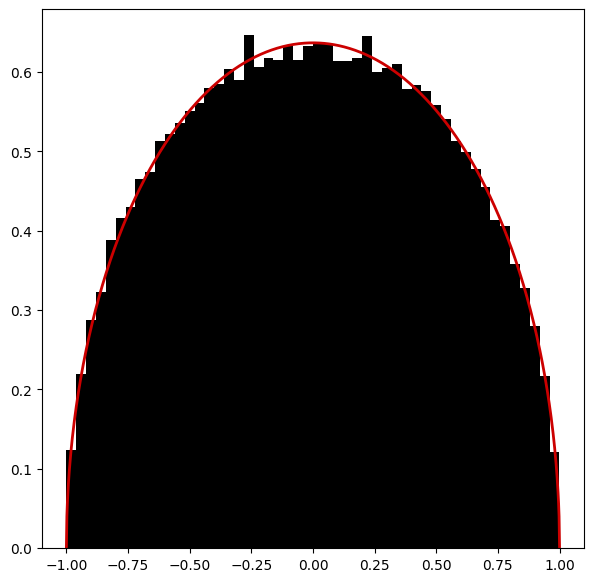

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# sample uniformly within a circle
def sample_circle(n):
    x_1 = np.zeros(n)
    x_2 = np.zeros(n)
    for i in range(n):
        while True:
            x_1[i] = np.random.uniform(-1, 1)
            x_2[i] = np.random.uniform(-1, 1)
            if x_1[i]**2 + x_2[i]**2 <= 1:
                break
    return x_1, x_2

# plot the circle and samples
def plot_circle(x_1, x_2):
    fig = plt.figure(figsize=(7, 7))
    plt.plot(x_1, x_2, 'k.')
    t = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(t), np.sin(t), 'r-')
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.show()

n = 100000
x_1, x_2 = sample_circle(n)

# marginal of x
def marginal(x):
    return (2 / np.pi) * np.sqrt(1 - x**2)

# plot the marginal of x and histogram of x
xx = np.linspace(-1, 1, 1000)

fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.hist(x_1, bins=50, density=True, color='k', alpha=1)
axs.plot(xx, marginal(xx), color=[0.8, 0, 0], linewidth=2)
plt.show()
